In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

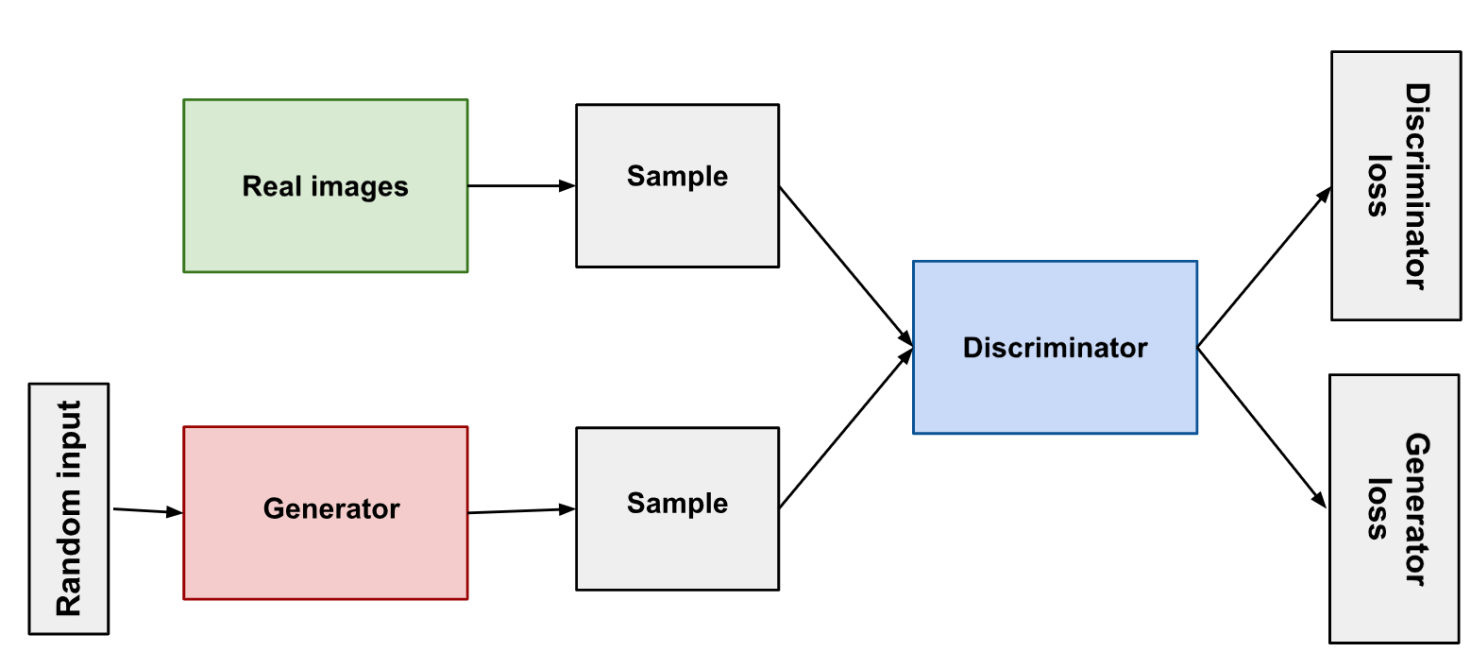

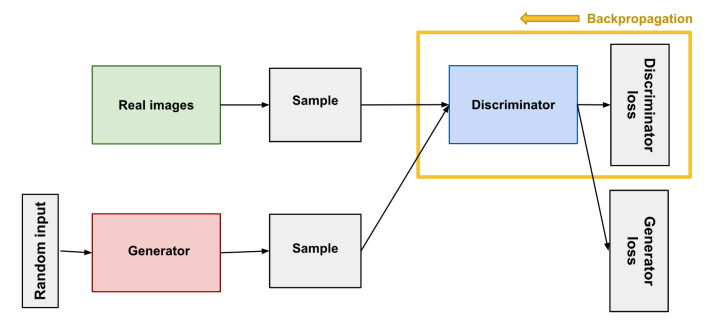

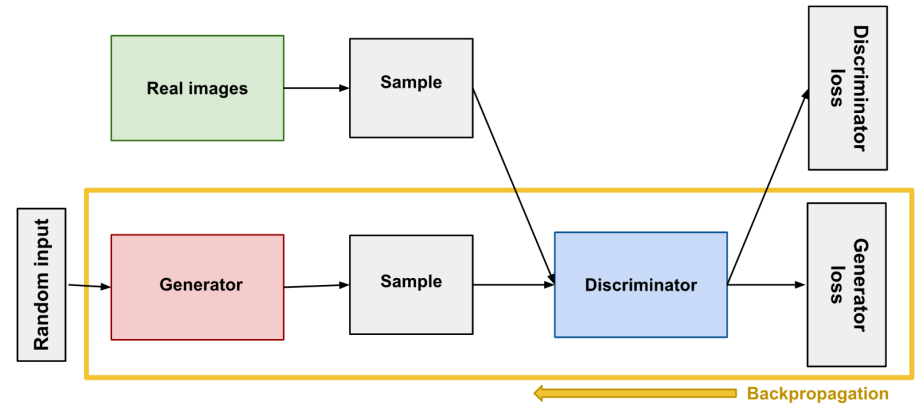

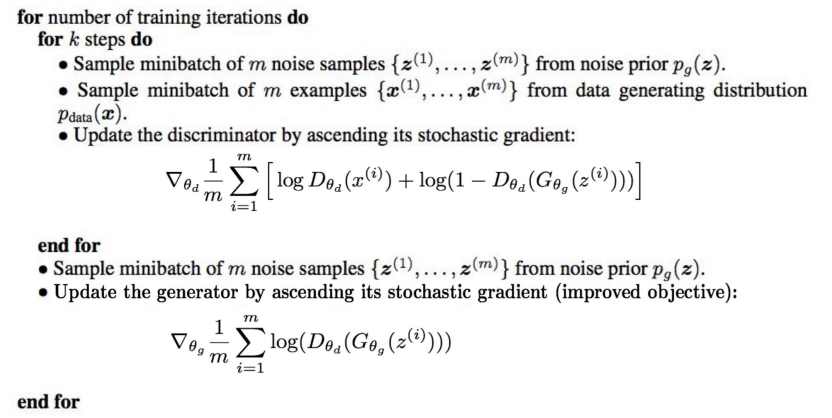

In [ ]:
real_age_data = np.load('eICU_age.npy')
real_age_data = real_age_data.astype(np.float32)
print(real_age_data)
mean = np.mean(real_age_data, axis=0)
std = np.std(real_age_data, axis=0)
real_age_data = (real_age_data - mean) / std


[87. 87. 76. ... 41. 72. 50.]


In [ ]:
generator = models.Sequential([
    layers.Dense(128, activation='relu', input_dim=50),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

discriminator = models.Sequential([
    layers.Dense(128, activation='relu', input_dim=1),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.002))

discriminator.trainable = False
gan = models.Sequential([generator,discriminator])
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),loss='binary_crossentropy')

In [ ]:
epochs = 4000
batch_size = 64
steps = 2
disc_loss_list = []
gan_loss_list = []

for i in range(epochs):
    disc_loss = 0
    for i in range(steps):
        noise_batch = np.random.normal(0, 1, size=(batch_size,50))
        indices = np.random.randint(0, real_age_data.shape[0], batch_size)
        real_batch = real_age_data[indices]
        disc_real_loss = discriminator.train_on_batch(real_batch, np.ones((batch_size, 1)))
        fake_batch = generator.predict(noise_batch, verbose=0)
        dis_fake_loss = discriminator.train_on_batch(fake_batch, np.zeros((batch_size, 1)))
        disc_loss += disc_real_loss + dis_fake_loss

    disc_loss_list.append(disc_loss/2)

    noise_batch = np.random.normal(0, 1, size=(batch_size,50))
    gan_loss = gan.train_on_batch(noise_batch, np.ones((batch_size, 1)))
    gan_loss_list.append(gan_loss)
    if i%100 == 0:
      print('Episode:',i, 'Discriminator Loss:', disc_loss, 'Genarator Loss:', gan_loss)


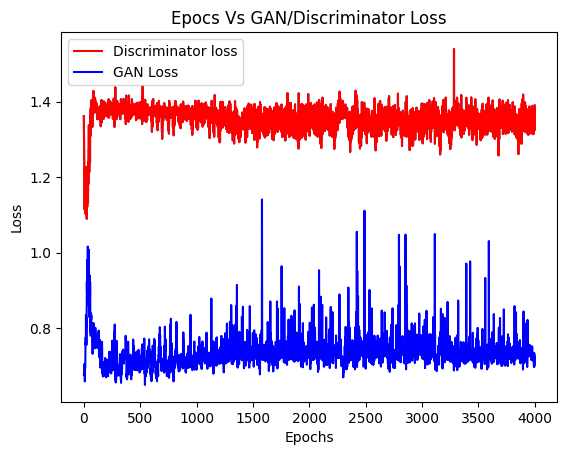

In [17]:
plt.plot(range(epochs), disc_loss_list)
plt.plot(range(epochs), disc_loss_list, 'r', label = 'Discriminator loss')
plt.plot(range(epochs), gan_loss_list, 'b', label = 'GAN Loss')
plt.title('Epocs Vs GAN/Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
noise = np.random.normal(0, 1, size=(real_age_data.shape[0],50))
generated_ages = generator.predict(noise)
real_age_data = np.load('eICU_age.npy')
real_age_data = real_age_data.astype(np.float32)
max_age = np.max(real_age_data)
min_age = np.min(real_age_data)
generated_ages = np.around((generated_ages - np.min(generated_ages)) * (max_age - min_age) / (np.max(generated_ages) - np.min(generated_ages))) + min_age

79/79 [==============================] - 0s 1ms/step


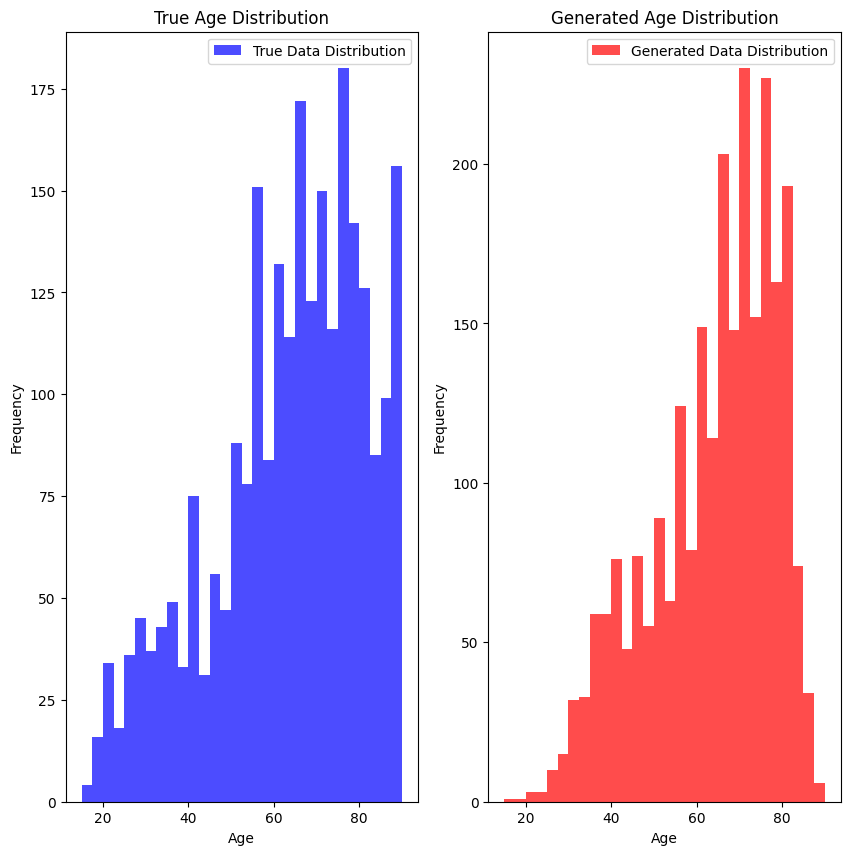

In [19]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.hist(real_age_data, bins=30, color='blue', alpha=0.7, label='True Data Distribution')
plt.title('True Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(generated_ages, bins=30, color='red', alpha=0.7, label='Generated Data Distribution')
plt.title('Generated Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()

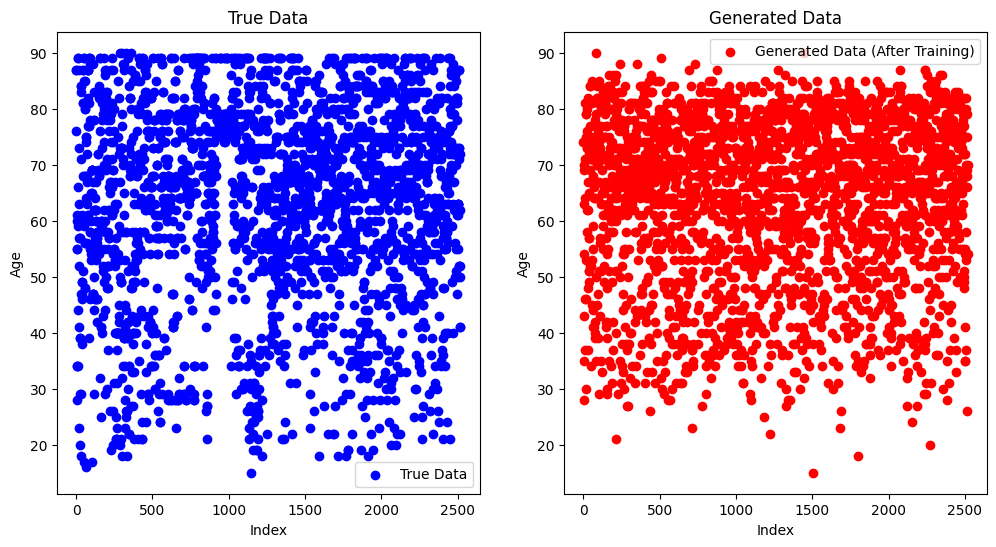

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(real_age_data)), real_age_data, color='blue', label='True Data')
plt.title('True Data')
plt.xlabel('Index')
plt.ylabel('Age')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(generated_ages)), generated_ages, color='red', label='Generated Data (After Training)')
plt.title('Generated Data')
plt.xlabel('Index')
plt.ylabel('Age')
plt.legend()

plt.show()